### Instead of manually grouping customer, we can also use clustering algorithms to break customers into segments

In [3]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns


##### Because we all know that a fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be clustered. The Elbow Method is one of the most popular methods to determine this optimal value of k.

In [30]:
#importing the data set first
df_ai = pd.read_csv('acct_income.csv')
df_ai

,acct_id,Active_day,Total_download,Game_download,Photo_download,Utilities_download,Entertainment_download,Social_download,Total_spend,app_spend,...,Entertainment_spend_ratio,Social_spend,Social_spend_ratio,iphone_exclusive,ipad_exclusive,both_side_download,Device_ownership,acct_create_dt,acct_create_lenth,payment_type
0,00028709c8d435ff,55,71,27,19,14,10,1,0.00,0.00,...,0.000000,0.00,0.000000,1,1,1,Both,2013-11-25,1031,0
1,0005a4d77127fde7,80,140,78,27,11,17,7,1048.69,57.83,...,0.091381,43.93,0.041890,1,1,1,Both,2007-12-20,3198,1
2,0005c296f2605c08,84,153,79,45,13,13,3,1208.55,45.81,...,0.046229,11.97,0.009904,1,1,1,Both,2011-04-02,1999,1
3,00082ad3dc50a70d,54,76,30,17,11,15,3,0.00,0.00,...,0.000000,0.00,0.000000,1,1,1,Both,2015-05-16,494,0
4,00085ff73786df4d,79,158,95,37,6,16,4,1255.51,60.86,...,0.112974,8.96,0.007137,1,1,1,Both,2012-03-04,1662,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27494,fe6c63f30e3d9f5c,58,74,27,13,22,7,5,0.00,0.00,...,0.000000,0.00,0.000000,1,1,1,Both,2014-12-28,633,0
27495,fe93f110d341986c,48,73,29,10,21,10,3,0.00,0.00,...,0.000000,0.00,0.000000,1,1,1,Both,2015-10-26,331,0
27496,ff17f853cf236e26,51,64,26,17,9,8,4,0.00,0.00,...,0.000000,0.00,0.000000,1,1,1,Both,2014-10-09,713,0
27497,ffac342dbee672be,87,157,84,33,17,18,5,1018.53,77.80,...,0.074441,28.95,0.028423,1,1,1,Both,2010-12-01,2121,1


In [5]:
df_ai.sort_values(by="Total_spend" , ascending=False)

,acct_id,Active_day,Total_download,Game_download,Photo_download,Utilities_download,Entertainment_download,Social_download,Total_spend,app_spend,...,Entertainment_spend_ratio,Social_spend,Social_spend_ratio,iphone_exclusive,ipad_exclusive,both_side_download,Device_ownership,acct_create_dt,acct_create_lenth,payment_type
14455,14d524ac4549e0af,110,1334,605,366,147,155,61,11799.75,84.76,...,0.089193,425.39,0.036051,1,1,1,Both,2008-04-06,3090,1
14128,9fcc62e657de2a80,110,1329,620,361,138,138,72,11686.79,53.76,...,0.072271,449.28,0.038443,1,1,1,Both,2009-12-02,2485,1
17262,8422035186298ab9,110,1343,613,391,145,128,66,11672.69,86.76,...,0.077764,443.34,0.037981,1,1,1,Both,2009-11-07,2510,1
20609,a653983875eb1db6,110,1340,607,369,162,136,66,11664.65,93.75,...,0.086470,442.34,0.037921,1,1,1,Both,2011-09-18,1830,1
25317,4bf5a3fdf5fddfe9,110,1321,608,339,155,148,71,11580.87,82.77,...,0.082940,521.29,0.045013,1,1,1,Both,2010-02-14,2411,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12725,e4973c8714ce1fd1,64,89,30,21,13,23,2,0.00,0.00,...,0.000000,0.00,0.000000,1,1,1,Both,2015-03-31,540,0
12727,e4c014754fcfacbc,60,76,33,15,18,8,2,0.00,0.00,...,0.000000,0.00,0.000000,1,1,1,Both,2016-03-30,175,0
12731,e5024d4481b4dfa3,49,65,20,20,7,13,5,0.00,0.00,...,0.000000,0.00,0.000000,1,1,1,Both,2015-01-14,616,0
12734,e5d0d2c2b1c6373f,41,52,15,15,7,12,3,0.00,0.00,...,0.000000,0.00,0.000000,1,1,1,Both,2016-06-27,86,0


##### Lets visualize ceratin features to have a better understanding of the distribution

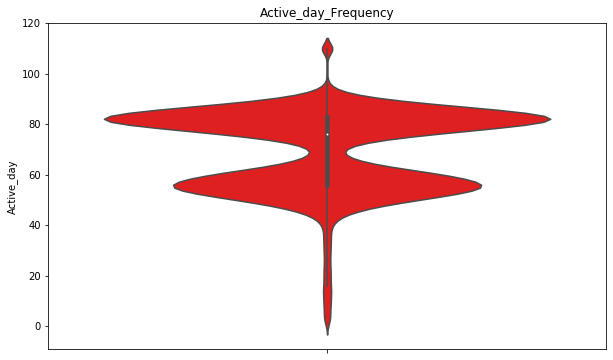

In [4]:
plt.figure(figsize=(10,6))
plt.title("Active_day_Frequency")
sns.axes_style("dark")
sns.violinplot(y=df_ai["Active_day"],color = 'red')
plt.show()

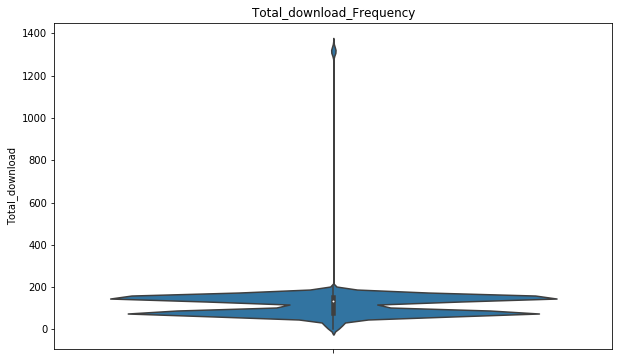

In [5]:
plt.figure(figsize=(10,6))
plt.title("Total_download_Frequency")
sns.axes_style("ticks")
sns.violinplot(y=df_ai["Total_download"])
plt.show()

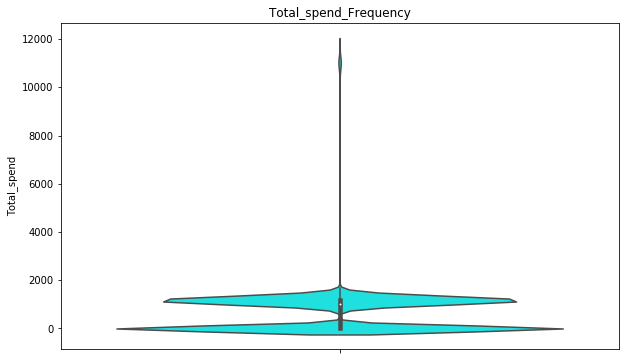

In [6]:
plt.figure(figsize=(10,6))
plt.title("Total_spend_Frequency")
sns.axes_style("ticks")
sns.violinplot(y=df_ai["Total_spend"],color = 'cyan')
plt.show()

##### Instead of arbitrarily setting interval to break customers into several groups, we can also evaluate certain features and group all the accounts automatically. We will mainly focus on acct_item_buy(total items purchased) and acct_amount_pay(total amounts spend)

###### At first we should scale the data to ensure most of our features are wthin the same scale

In [1]:

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [6]:
df_ai.columns

Index(['acct_id', 'Active_day', 'Total_download', 'Game_download',
       'Photo_download', 'Utilities_download', 'Entertainment_download',
       'Social_download', 'Total_spend', 'app_spend', 'inapp_spend',
       'Game_spend', 'Game_spend_ratio', 'Photo_spend', 'Photo_spend_ratio',
       'Utilities_spend', 'Utilities_spend_ratio', 'Entertainment_spend',
       'Entertainment_spend_ratio', 'Social_spend', 'Social_spend_ratio',
       'iphone_exclusive', 'ipad_exclusive', 'both_side_download',
       'Device_ownership', 'acct_create_dt', 'acct_create_lenth',
       'payment_type'],
      dtype='object')

In [7]:
df_ai = pd.concat([df_ai,pd.get_dummies(df_ai['payment_type'], prefix='customer_profile')],axis=1)
df_ai = pd.concat([df_ai,pd.get_dummies(df_ai['Device_ownership'], prefix='customer_profile')],axis=1)

In [56]:
df_ai['Total_download'] = ss.fit_transform(df_ai[['Total_download']]) #scale the download number
df_ai['Total_spend'] = ss.fit_transform(df_ai[['Total_spend']]) #scale the total spend
df_ai['app_spend'] = ss.fit_transform(df_ai[['app_spend']]) 
df_ai['inapp_spend'] = ss.fit_transform(df_ai[['inapp_spend']]) 
df_ai['Game_spend'] = ss.fit_transform(df_ai[['Game_spend']]) 
df_ai['Photo_spend'] = ss.fit_transform(df_ai[['Photo_spend']]) 
df_ai['Social_spend'] = ss.fit_transform(df_ai[['Social_spend']]) 
df_ai['Entertainment_spend'] = ss.fit_transform(df_ai[['Entertainment_spend']])
df_ai['Social_spend'] = ss.fit_transform(df_ai[['Social_spend']])
df_ai['Utilities_spend'] = ss.fit_transform(df_ai[['Utilities_spend']])


df_ai['Active_day'] = ss.fit_transform(df_ai[['Active_day']]) #scale the Active_day
df_ai['acct_create_lenth'] = ss.fit_transform(df_ai[['acct_create_lenth']]) #scale the acct_create_lenth

df_ai['Game_download'] = ss.fit_transform(df_ai[['Game_download']]) 
df_ai['Photo_download'] = ss.fit_transform(df_ai[['Photo_download']])
df_ai['Utilities_download'] = ss.fit_transform(df_ai[['Utilities_download']])
df_ai['Entertainment_download'] = ss.fit_transform(df_ai[['Entertainment_download']])
df_ai['Social_download'] = ss.fit_transform(df_ai[['Social_download']])



In [57]:
df_ai.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Active_day,27499.0,1.941185e-16,1.000018,-4.173551,-0.808475,0.415189,0.843471,2.495417
Total_download,27499.0,4.818543e-17,1.000018,-1.250866,-0.458919,0.117042,0.302173,12.654486
Game_download,27499.0,7.569574e-17,1.000018,-1.231280,-0.666064,0.213162,0.485303,12.166438
Photo_download,27499.0,-4.032981e-17,1.000018,-1.025441,-0.384846,-0.064548,0.220161,14.420023
Utilities_download,27499.0,-2.022193e-17,1.000018,-1.447254,-0.321494,-0.040055,0.147572,14.782443
Entertainment_download,27499.0,1.721231e-16,1.000018,-1.387881,-0.305031,-0.108149,0.187173,15.347068
Social_download,27499.0,1.747878e-16,1.000018,-0.954335,-0.430301,-0.080945,0.268410,16.338770
Total_spend,27499.0,7.002916e-16,1.000018,-0.716735,-0.716735,0.311988,0.509376,11.497171
app_spend,27499.0,5.372403e-16,1.000018,-1.011978,-1.011978,0.151312,0.855309,3.156659
inapp_spend,27499.0,9.609996e-16,1.000018,-0.693926,-0.693926,0.287866,0.488922,11.714832


In [12]:
features = ['acct_id', 'Active_day', 'Total_download', 'Game_download',
       'Photo_download', 'Utilities_download', 'Entertainment_download',
       'Social_download', 'Total_spend', 'app_spend', 'inapp_spend',
       'Game_spend', 'Game_spend_ratio', 'Photo_spend', 'Photo_spend_ratio',
       'Utilities_spend', 'Utilities_spend_ratio', 'Entertainment_spend',
       'Entertainment_spend_ratio', 'Social_spend', 'Social_spend_ratio',
       'iphone_exclusive', 'ipad_exclusive', 'both_side_download',
       'Device_ownership', 'acct_create_dt', 'acct_create_lenth',
       'payment_type', 'customer_profile_0', 'customer_profile_1',
       'customer_profile_Both', 'customer_profile_Uncertain',
       'customer_profile_ipad_only', 'customer_profile_iphone_only']

features_to_keep = ['Active_day', 'Total_download', 'Game_download',
       'Photo_download', 'Utilities_download', 'Entertainment_download',
       'Social_download', 'Total_spend', 'app_spend', 'inapp_spend',
       'Game_spend', 'Game_spend_ratio', 'Photo_spend', 'Photo_spend_ratio',
       'Utilities_spend', 'Utilities_spend_ratio', 'Entertainment_spend',
       'Entertainment_spend_ratio', 'Social_spend', 'Social_spend_ratio', 'acct_create_lenth',
       'customer_profile_0', 'customer_profile_1','customer_profile_Both', 
        'customer_profile_Uncertain','customer_profile_ipad_only', 'customer_profile_iphone_only']

In [13]:
X = df_ai[features_to_keep]


In [14]:
X.describe()

,Active_day,Total_download,Game_download,Photo_download,Utilities_download,Entertainment_download,Social_download,Total_spend,app_spend,inapp_spend,...,Entertainment_spend_ratio,Social_spend,Social_spend_ratio,acct_create_lenth,customer_profile_0,customer_profile_1,customer_profile_Both,customer_profile_Uncertain,customer_profile_ipad_only,customer_profile_iphone_only
count,2.749900e+04,2.749900e+04,2.749900e+04,2.749900e+04,2.749900e+04,2.749900e+04,2.749900e+04,2.749900e+04,2.749900e+04,2.749900e+04,...,27499.000000,2.749900e+04,27499.000000,2.749900e+04,27499.00000,27499.00000,27499.000000,27499.000000,27499.000000,27499.000000
mean,3.640453e-16,-2.235061e-17,7.569574e-17,-4.363032e-17,4.264118e-17,2.296146e-16,2.662210e-17,7.980593e-16,5.807808e-16,9.609996e-16,...,0.039545,4.373136e-16,0.017621,1.291161e-17,0.45478,0.54522,0.989381,0.001964,0.006437,0.002218
std,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,...,0.040945,1.000018e+00,0.020189,1.000018e+00,0.49796,0.49796,0.102500,0.044271,0.079971,0.047047
min,-4.173551e+00,-1.250866e+00,-1.231280e+00,-1.025441e+00,-1.447254e+00,-1.387881e+00,-9.543346e-01,-7.167346e-01,-1.011978e+00,-6.939258e-01,...,0.000000,-5.746556e-01,0.000000,-1.720151e+00,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,-8.084753e-01,-4.589191e-01,-6.660636e-01,-3.848461e-01,-3.214944e-01,-3.050310e-01,-4.303011e-01,-7.167346e-01,-1.011978e+00,-6.939258e-01,...,0.000000,-5.746556e-01,0.000000,-8.644713e-01,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000
50%,4.151887e-01,1.170422e-01,2.131616e-01,-6.454847e-02,-4.005461e-02,-1.081493e-01,-8.094547e-02,3.119879e-01,1.513125e-01,2.878657e-01,...,0.038365,-2.473563e-01,0.011191,-5.046111e-04,0.00000,1.00000,1.000000,0.000000,0.000000,0.000000
75%,8.434711e-01,3.021726e-01,4.853028e-01,2.201606e-01,1.475719e-01,1.871733e-01,2.684102e-01,5.093760e-01,8.553091e-01,4.889217e-01,...,0.073442,3.829978e-01,0.032284,8.562106e-01,1.00000,1.00000,1.000000,0.000000,0.000000,0.000000
max,2.495417e+00,1.265449e+01,1.216644e+01,1.442002e+01,1.478244e+01,1.534707e+01,1.633877e+01,1.149717e+01,3.156659e+00,1.171483e+01,...,0.218293,1.556680e+01,0.195342,1.744004e+00,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000


In [15]:
X.describe().transpose()  

,count,mean,std,min,25%,50%,75%,max
Active_day,27499.0,3.640453e-16,1.000018,-4.173551,-0.808475,0.415189,0.843471,2.495417
Total_download,27499.0,-2.235061e-17,1.000018,-1.250866,-0.458919,0.117042,0.302173,12.654486
Game_download,27499.0,7.569574e-17,1.000018,-1.231280,-0.666064,0.213162,0.485303,12.166438
Photo_download,27499.0,-4.363032e-17,1.000018,-1.025441,-0.384846,-0.064548,0.220161,14.420023
Utilities_download,27499.0,4.264118e-17,1.000018,-1.447254,-0.321494,-0.040055,0.147572,14.782443
Entertainment_download,27499.0,2.296146e-16,1.000018,-1.387881,-0.305031,-0.108149,0.187173,15.347068
Social_download,27499.0,2.662210e-17,1.000018,-0.954335,-0.430301,-0.080945,0.268410,16.338770
Total_spend,27499.0,7.980593e-16,1.000018,-0.716735,-0.716735,0.311988,0.509376,11.497171
app_spend,27499.0,5.807808e-16,1.000018,-1.011978,-1.011978,0.151312,0.855309,3.156659
inapp_spend,27499.0,9.609996e-16,1.000018,-0.693926,-0.693926,0.287866,0.488922,11.714832


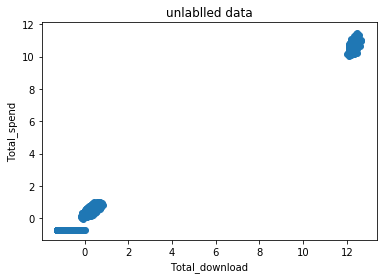

In [16]:
%matplotlib inline
from matplotlib import pyplot as plt
fig1 = plt.figure()
plt.scatter(X.loc[:,'Total_download'],X.loc[:,'Total_spend'])
plt.title('unlablled data')
plt.xlabel('Total_download')
plt.ylabel('Total_spend')
plt.show()

# We now define the following:
#### Distortion: It is calculated as the average of the squared distances from the cluster centers of the respective clusters. Typically, the Euclidean distance metric is used.
#### Inertia: It is the sum of squared distances of samples to their closest cluster center.

In [17]:
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kM = KMeans(n_clusters=k).fit(X) 
    kM.fit(X)     
      
    distortions.append(sum(np.min(cdist(X, kM.cluster_centers_,  
                      'euclidean'),axis=1)) / X.shape[0]) 
    inertias.append(kM.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(X, kM.cluster_centers_, 
                 'euclidean'),axis=1)) / X.shape[0] 
    mapping2[k] = kM.inertia_ 

In [18]:

for key,val in mapping1.items(): 
    print(str(key)+' : '+str(val)) 

1 : 2.8704717515305878
2 : 2.6619079257710236
3 : 1.1600415662579446
4 : 1.1096610597833987
5 : 1.0608607649893642
6 : 1.0249437755338622
7 : 0.9859139104761917
8 : 0.962545112888332
9 : 0.9409533224670883


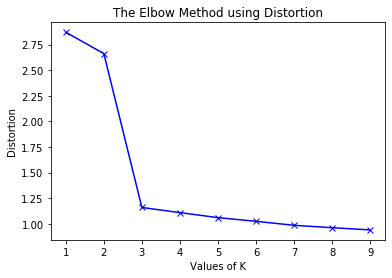

In [19]:

plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

In [20]:
for key,val in mapping2.items(): 
    print(str(key)+' : '+str(val)) 

1 : 457441.01466423547
2 : 202201.20580648942
3 : 44371.37014274648
4 : 38993.03071671325
5 : 35257.832545930345
6 : 32866.63093179392
7 : 31175.689557753834
8 : 29506.098182134596
9 : 28498.766969805725


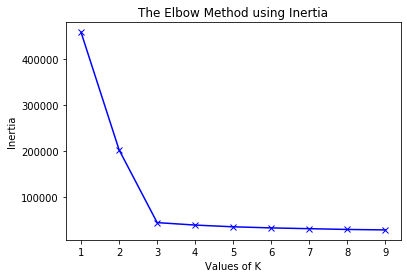

In [21]:
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show() 

###### To determine the optimal number of clusters, we have to select the value of k at the “elbow” ie the point after which the distortion/inertia start decreasing in a linear fashion. Thus for the given data, we conclude that the optimal number of clusters for the data is 3.

##### The objective of any clustering algorithm is to ensure that the distance between datapoints in a cluster is very low compared to the distance between 2 clusters. In other words, members of a group are very similar, and members of different groups are extremely dissimilar.

###### Based on the distortion metircs, it seems 3, 4, 5 can all be good candidates. While we also considering inertia, 3 seems to be the best candidates. But lets try 3 , 4, 5.

In [9]:
##Fitting kmeans to the dataset with k=3
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

#Visualizing the clusters for k=3


In [23]:
km3 = KMeans(n_clusters=3)
clusters = km3.fit_predict(X.iloc[:,0:])
X["label"] = clusters

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [25]:
X["label"].value_counts()

0    14843
1    12506
2      150
Name: label, dtype: int64

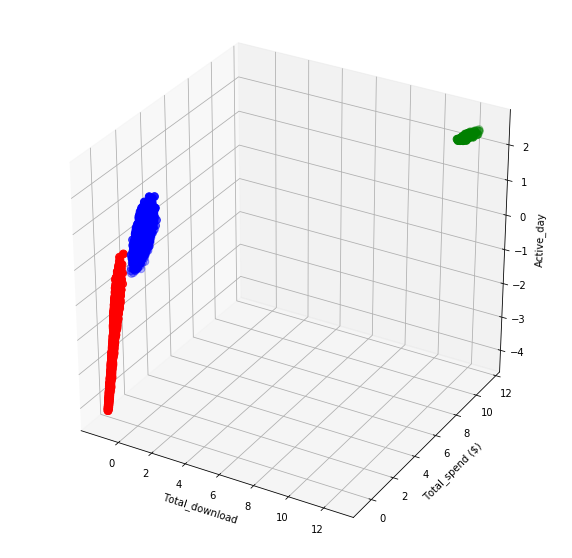

In [26]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X['Total_download'][X["label"] == 0], X['Total_spend'][X["label"] == 0],X['Active_day'][X["label"] == 0], c='blue', s=60)
ax.scatter(X['Total_download'][X["label"] == 1], X['Total_spend'][X["label"] == 1],X['Active_day'][X["label"] == 1],  c='red', s=60)
ax.scatter(X['Total_download'][X["label"] == 2], X['Total_spend'][X["label"] == 2],X['Active_day'][X["label"] == 2],  c='green', s=60)
#plt.scatter(km3.cluster_centers_[:,0], km3.cluster_centers_[:,1],km3.cluster_centers_[:,2],marker='s', c='cyan', alpha=0.7, label='Centroids')

#ax.view_init(30, 185)
plt.xlabel("Total_download")
plt.ylabel("Total_spend ($)")
ax.set_zlabel('Active_day')
plt.show()

In [161]:
X.drop(columns=['label'])

,Active_day,Total_download,Game_download,Photo_download,Utilities_download,Entertainment_download,Social_download,Total_spend,app_spend,inapp_spend,...,Entertainment_spend_ratio,Social_spend,Social_spend_ratio,acct_create_lenth,customer_profile_0,customer_profile_1,customer_profile_Both,customer_profile_Uncertain,customer_profile_ipad_only,customer_profile_iphone_only
0,-0.869658,-0.530914,-0.666064,-0.349258,-0.133868,-0.403472,-0.779657,-0.716735,-1.011978,-0.693926,...,0.000000,-0.574656,0.000000,-0.652105,1,0,1,0,0,0
1,0.659921,0.178752,0.401567,-0.064548,-0.415308,0.285614,0.268410,0.368763,0.556890,0.355613,...,0.091381,0.534778,0.041890,1.592758,0,1,1,0,0,0
2,0.904654,0.312458,0.422501,0.576047,-0.227681,-0.108149,-0.430301,0.534234,0.230800,0.537672,...,0.046229,-0.272358,0.009904,0.350676,0,1,1,0,0,0
3,-0.930842,-0.479489,-0.603262,-0.420435,-0.415308,0.088732,-0.430301,-0.716735,-1.011978,-0.693926,...,0.000000,-0.574656,0.000000,-1.208401,1,0,1,0,0,0
4,0.598738,0.363883,0.757444,0.291338,-0.884374,0.187173,-0.255623,0.582842,0.639091,0.571472,...,0.112974,-0.348375,0.007137,0.001567,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27494,-0.686109,-0.500059,-0.666064,-0.562789,0.616638,-0.698795,-0.080945,-0.716735,-1.011978,-0.693926,...,0.000000,-0.574656,0.000000,-1.064406,1,0,1,0,0,0
27495,-1.297941,-0.510344,-0.624196,-0.669555,0.522825,-0.403472,-0.430301,-0.716735,-1.011978,-0.693926,...,0.000000,-0.574656,0.000000,-1.377257,1,0,1,0,0,0
27496,-1.114391,-0.602909,-0.686998,-0.420435,-0.602934,-0.600354,-0.255623,-0.716735,-1.011978,-0.693926,...,0.000000,-0.574656,0.000000,-0.981532,1,0,1,0,0,0
27497,1.088204,0.353598,0.527171,0.148983,0.147572,0.384055,-0.080945,0.337544,1.098656,0.302515,...,0.074441,0.156464,0.028423,0.477060,0,1,1,0,0,0


In [43]:
#lets try 4 clusters
km4 = KMeans(n_clusters=4)
clusters = km4.fit_predict(X.iloc[:,0:])
X["label"] = clusters

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [44]:
X["label"].value_counts()

1    12506
0     8615
3     6228
2      150
Name: label, dtype: int64

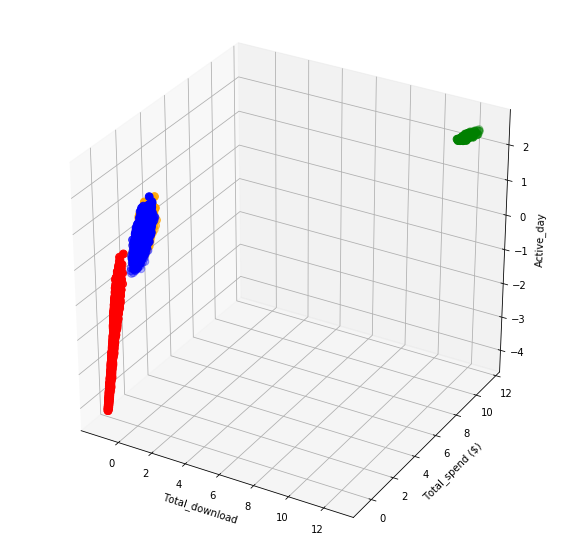

In [45]:
fig2 = plt.figure(figsize=(10,10))
ax = fig2.add_subplot(111, projection = '3d')
ax.scatter(X['Total_download'][X["label"] == 0], X['Total_spend'][X["label"] == 0],X['Active_day'][X["label"] == 0], c='blue', s=60)
ax.scatter(X['Total_download'][X["label"] == 1], X['Total_spend'][X["label"] == 1],X['Active_day'][X["label"] == 1],  c='red', s=60)
ax.scatter(X['Total_download'][X["label"] == 2], X['Total_spend'][X["label"] == 2],X['Active_day'][X["label"] == 2],  c='green', s=60)
ax.scatter(X['Total_download'][X["label"] == 3], X['Total_spend'][X["label"] == 3],X['Active_day'][X["label"] == 3],  c='orange', s=60)


#ax.view_init(30, 185)
plt.xlabel("Total_download")
plt.ylabel("Total_spend ($)")
ax.set_zlabel('Active_day')
plt.show()

In [29]:
X.drop(columns=['label'])


,Active_day,Total_download,Game_download,Photo_download,Utilities_download,Entertainment_download,Social_download,Total_spend,app_spend,inapp_spend,...,Entertainment_spend_ratio,Social_spend,Social_spend_ratio,acct_create_lenth,customer_profile_0,customer_profile_1,customer_profile_Both,customer_profile_Uncertain,customer_profile_ipad_only,customer_profile_iphone_only
0,55,71,27,19,14,10,1,0.00,0.00,0.00,...,0.000000,0.00,0.000000,1031,1,0,1,0,0,0
1,80,140,78,27,11,17,7,1048.69,57.83,990.86,...,0.091381,43.93,0.041890,3198,0,1,1,0,0,0
2,84,153,79,45,13,13,3,1208.55,45.81,1162.74,...,0.046229,11.97,0.009904,1999,0,1,1,0,0,0
3,54,76,30,17,11,15,3,0.00,0.00,0.00,...,0.000000,0.00,0.000000,494,1,0,1,0,0,0
4,79,158,95,37,6,16,4,1255.51,60.86,1194.65,...,0.112974,8.96,0.007137,1662,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27494,58,74,27,13,22,7,5,0.00,0.00,0.00,...,0.000000,0.00,0.000000,633,1,0,1,0,0,0
27495,48,73,29,10,21,10,3,0.00,0.00,0.00,...,0.000000,0.00,0.000000,331,1,0,1,0,0,0
27496,51,64,26,17,9,8,4,0.00,0.00,0.00,...,0.000000,0.00,0.000000,713,1,0,1,0,0,0
27497,87,157,84,33,17,18,5,1018.53,77.80,940.73,...,0.074441,28.95,0.028423,2121,0,1,1,0,0,0


In [31]:
#5 clusters
km5 = KMeans(n_clusters=5)
clusters = km5.fit_predict(X.iloc[:,0:])
X["label"] = clusters

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [32]:
X["label"].value_counts()

0    11783
3     8615
1     6228
4      723
2      150
Name: label, dtype: int64

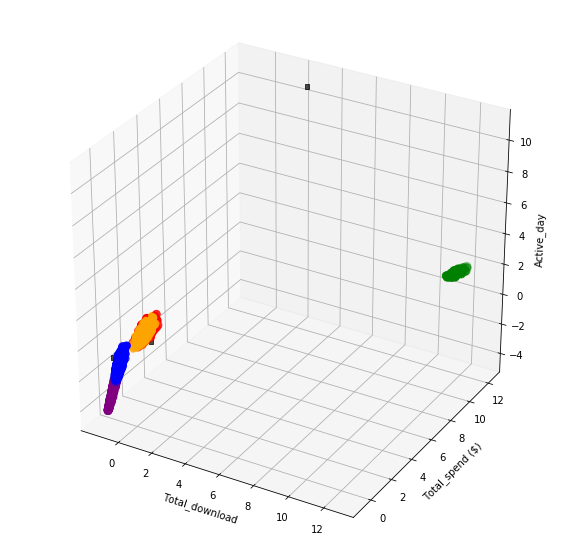

In [33]:
fig3 = plt.figure(figsize=(10,10))
ax = fig3.add_subplot(111, projection = '3d')
ax.scatter(X['Total_download'][X["label"] == 0], X['Total_spend'][X["label"] == 0],X['Active_day'][X["label"] == 0], c='blue', s=60)
ax.scatter(X['Total_download'][X["label"] == 1], X['Total_spend'][X["label"] == 1],X['Active_day'][X["label"] == 1],  c='red', s=60)
ax.scatter(X['Total_download'][X["label"] == 2], X['Total_spend'][X["label"] == 2],X['Active_day'][X["label"] == 2],  c='green', s=60)
ax.scatter(X['Total_download'][X["label"] == 3], X['Total_spend'][X["label"] == 3],X['Active_day'][X["label"] == 3],  c='orange', s=30)
ax.scatter(X['Total_download'][X["label"] == 4], X['Total_spend'][X["label"] == 4],X['Active_day'][X["label"] == 4],  c='purple', s=60)


ax.scatter(km3.cluster_centers_[:,0], km3.cluster_centers_[:,1],km3.cluster_centers_[:,2],marker='s', c='black', alpha=0.7, label='Centroids')

#ax.view_init(30, 185)
plt.xlabel("Total_download")
plt.ylabel("Total_spend ($)")
ax.set_zlabel('Active_day')
plt.show()

###### K=5 and K=4 seems not be a ideal choice because the clusters are overlapping already. Also lets bring back the original scaling.

In [32]:
#lets reinput the data and 
df_aci = pd.read_csv('acct_income.csv')
df_aci


,acct_id,Active_day,Total_download,Game_download,Photo_download,Utilities_download,Entertainment_download,Social_download,Total_spend,app_spend,...,Entertainment_spend_ratio,Social_spend,Social_spend_ratio,iphone_exclusive,ipad_exclusive,both_side_download,Device_ownership,acct_create_dt,acct_create_lenth,payment_type
0,00028709c8d435ff,55,71,27,19,14,10,1,0.00,0.00,...,0.000000,0.00,0.000000,1,1,1,Both,2013-11-25,1031,0
1,0005a4d77127fde7,80,140,78,27,11,17,7,1048.69,57.83,...,0.091381,43.93,0.041890,1,1,1,Both,2007-12-20,3198,1
2,0005c296f2605c08,84,153,79,45,13,13,3,1208.55,45.81,...,0.046229,11.97,0.009904,1,1,1,Both,2011-04-02,1999,1
3,00082ad3dc50a70d,54,76,30,17,11,15,3,0.00,0.00,...,0.000000,0.00,0.000000,1,1,1,Both,2015-05-16,494,0
4,00085ff73786df4d,79,158,95,37,6,16,4,1255.51,60.86,...,0.112974,8.96,0.007137,1,1,1,Both,2012-03-04,1662,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27494,fe6c63f30e3d9f5c,58,74,27,13,22,7,5,0.00,0.00,...,0.000000,0.00,0.000000,1,1,1,Both,2014-12-28,633,0
27495,fe93f110d341986c,48,73,29,10,21,10,3,0.00,0.00,...,0.000000,0.00,0.000000,1,1,1,Both,2015-10-26,331,0
27496,ff17f853cf236e26,51,64,26,17,9,8,4,0.00,0.00,...,0.000000,0.00,0.000000,1,1,1,Both,2014-10-09,713,0
27497,ffac342dbee672be,87,157,84,33,17,18,5,1018.53,77.80,...,0.074441,28.95,0.028423,1,1,1,Both,2010-12-01,2121,1


In [33]:
df_aci = pd.concat([df_aci,pd.get_dummies(df_aci['payment_type'], prefix='customer_profile')],axis=1)
df_aci = pd.concat([df_aci,pd.get_dummies(df_aci['Device_ownership'], prefix='customer_profile')],axis=1)


In [34]:
features_to_keep = ['Active_day', 'Total_download', 'Game_download',
       'Photo_download', 'Utilities_download', 'Entertainment_download',
       'Social_download', 'Total_spend', 'app_spend', 'inapp_spend',
       'Game_spend', 'Game_spend_ratio', 'Photo_spend', 'Photo_spend_ratio',
       'Utilities_spend', 'Utilities_spend_ratio', 'Entertainment_spend',
       'Entertainment_spend_ratio', 'Social_spend', 'Social_spend_ratio', 'acct_create_lenth',
       'customer_profile_0', 'customer_profile_1','customer_profile_Both', 
        'customer_profile_Uncertain','customer_profile_ipad_only', 'customer_profile_iphone_only']

X = df_aci[features_to_keep]


In [35]:
km3 = KMeans(n_clusters=3)
clusters = km3.fit_predict(X.iloc[:,0:])
X["label"] = clusters


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


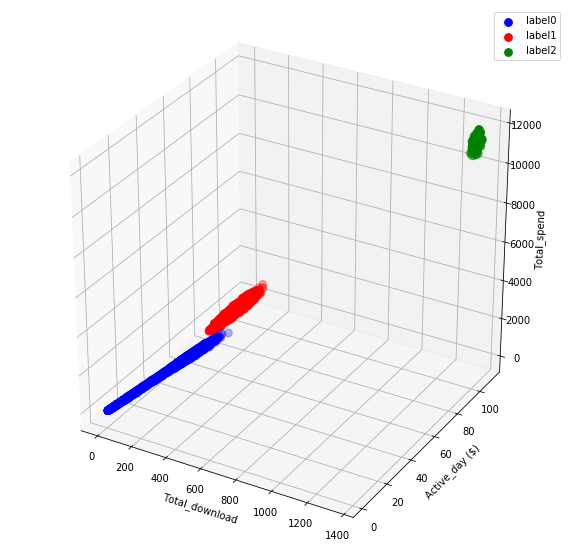

In [36]:
%matplotlib inline
fig4 = plt.figure(figsize=(10,10))
ax = fig4.add_subplot(111, projection = '3d')
label0 = ax.scatter(X['Total_download'][X["label"] == 0], X['Active_day'][X["label"] == 0],X['Total_spend'][X["label"] == 0], c='blue', s=60)
label1 = ax.scatter(X['Total_download'][X["label"] == 1], X['Active_day'][X["label"] == 1],X['Total_spend'][X["label"] == 1],  c='red', s=60)
label2 = ax.scatter(X['Total_download'][X["label"] == 2], X['Active_day'][X["label"] == 2],X['Total_spend'][X["label"] == 2],  c='green', s=60)
ax.legend((label0,label1,label2),('label0','label1','label2'))


#ax.view_init(30, 185)
plt.xlabel("Total_download")
plt.ylabel("Active_day ($)")
ax.set_zlabel('Total_spend')
plt.show()

In [37]:
X.groupby('label')['acct_create_lenth'].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0,12506.0,755.223813,447.495672,0.0,372.00,748.0,1131.00,1985.0
1,14843.0,2415.483864,536.855561,1063.0,1963.00,2411.0,2876.00,3344.0
2,150.0,2425.860000,551.290372,1304.0,1947.25,2464.5,2891.75,3315.0


In [26]:
#Lets take a look at what each segment looks like.Firstly,lets take a look at download feature
X.groupby('label')['Total_download'].describe()


,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0,14843.0,150.949875,12.058561,105.0,143.00,151.0,159.0,203.0
1,12506.0,74.660803,15.025845,1.0,70.00,77.0,83.0,124.0
2,150.0,1317.826667,12.418187,1289.0,1308.25,1316.0,1327.0,1353.0


In [27]:
#Then total spending
X.groupby('label')['Total_spend'].describe()


,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0,14843.0,1171.463532,130.145966,649.97,1081.70,1169.580,1256.610,1673.19
1,12506.0,0.000000,0.000000,0.00,0.00,0.000,0.000,0.00
2,150.0,11020.877933,266.826057,10408.08,10845.32,11019.835,11171.005,11799.75


In [28]:
#Then average active day(with transactions)
X.groupby('label')['Active_day'].describe()


,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0,14843.0,82.003032,4.503714,65.0,79.0,82.0,85.0,99.0
1,12506.0,53.545978,10.187236,1.0,51.0,55.0,59.0,78.0
2,150.0,109.993333,0.081650,109.0,110.0,110.0,110.0,110.0


##### Label 0 is moderate users. Label 1 is probablly loyal consumers or business account users. While Label 2 is Leisure users or freeonly users.

## We can also use clustering to segment apps


In [39]:
#first thing fitst,import the app data set
df_ap = pd.read_csv('app_profile.csv')
df_ap


,app_name,category_id,With_inapp_ornot,parent_app_id,Active_sales_day,download_volume,consumer_volume,Total_downloads,inapp_download,app_download,June_download,July_download,August_download,September_download,Total_sale,inapp_sale,app_sale
0,doubts methinks,Games,Without Inapp,002f3775d84a816a,110,923,895,923,0,923,240,270,243,170,8297.77,0.00,8297.77
1,cove! random,Social Networking,Without Inapp,018cc526b9da06f6,110,993,958,993,0,993,273,272,266,182,983.07,0.00,983.07
2,bunk bringing,Games,Without Inapp,019008a4dabf7c93,110,4099,3469,4099,0,4099,1108,1119,1077,795,0.00,0.00,0.00
3,marked complement,Games,With Inapp,019606b1e936b000,110,5817,4512,5817,5817,0,1551,1699,1480,1087,69744.83,69744.83,0.00
4,Whales forehead,Games,Without Inapp,01968c31d2a1428c,110,1013,977,1013,0,1013,289,279,268,177,2015.87,0.00,2015.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,100000000 pouring,Utilities,Without Inapp,fef20cb95a45d053,110,994,962,994,0,994,281,256,268,189,3966.06,0.00,3966.06
996,cupbearers Swerve,Entertainment,With Inapp,ff0e2aceea49b8f0,110,1421,1309,1421,1421,0,404,386,376,255,2748.79,2748.79,0.00
997,quills sheered,Photos & Videos,Without Inapp,ff2a145e057177ab,110,4121,3472,4121,0,4121,1057,1173,1068,823,0.00,0.00,0.00
998,fully contradictory,Games,Without Inapp,ff6a79a3254d8ad5,110,932,905,932,0,932,252,265,231,184,922.68,0.00,922.68


In [40]:
df_ap = df_ap.sort_values(by= 'Total_sale',ascending = False)
df_ap

,app_name,category_id,With_inapp_ornot,parent_app_id,Active_sales_day,download_volume,consumer_volume,Total_downloads,inapp_download,app_download,June_download,July_download,August_download,September_download,Total_sale,inapp_sale,app_sale
384,aright Davy,Games,With Inapp,62bbc9735ee184a4,110,38853,13817,38853,38853,0,10671,10893,9943,7346,525102.47,525102.47,0.0
519,unwritten hungry,Games,With Inapp,8590a25d4e5c249c,110,64492,14889,64492,53780,10712,14862,16944,18270,14416,505560.20,505560.20,0.0
669,ceases half;,Games,With Inapp,a97a0c4386d37a1f,110,36122,13585,36122,36122,0,9848,10334,9048,6892,345035.78,345035.78,0.0
372,AS-IS vagueness,Games,With Inapp,606831f2120952a9,110,21094,11203,21094,21094,0,5612,5998,5372,4112,322966.06,322966.06,0.0
450,'vomited men,Games,With Inapp,74093d44c41ee885,110,17889,10424,17889,17889,0,4999,5062,4517,3311,322577.11,322577.11,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,Chili psalmody,Entertainment,Without Inapp,1f6c4142d53f86d8,110,4205,3531,4205,0,4205,1131,1185,1087,802,0.00,0.00,0.0
310,half-attained (DUODECIMO),Entertainment,Without Inapp,5059f004a5f90cec,110,4193,3529,4193,0,4193,1066,1183,1088,856,0.00,0.00,0.0
108,sill fish;,Games,Without Inapp,1e3ac2b3b7716d41,110,4100,3456,4100,0,4100,1101,1110,1062,827,0.00,0.00,0.0
316,alter wrought,Photos & Videos,Without Inapp,516eafe9a9fc183f,110,4121,3522,4121,0,4121,1109,1140,1107,765,0.00,0.00,0.0


#### Like what we did before, lets first visualize some metrisc to better understand the whole data set

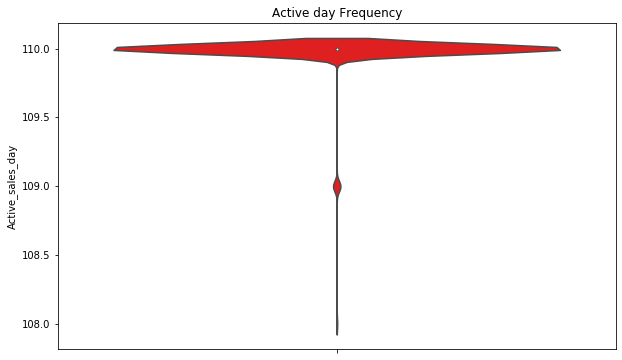

In [5]:
plt.figure(figsize=(10,6))
plt.title("Active day Frequency")
sns.axes_style("dark")
sns.violinplot(y=df_ap["Active_sales_day"],color = 'red')
plt.show() #most of the apps have transactions on daily basis

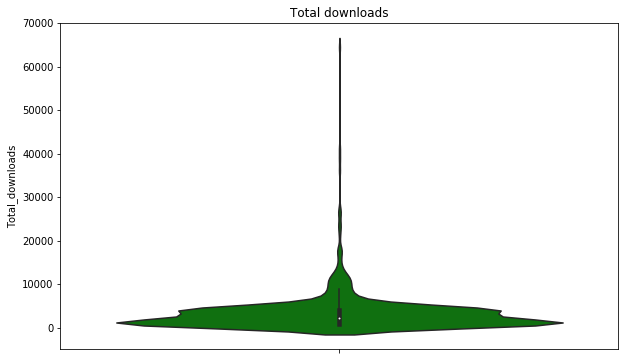

In [6]:
plt.figure(figsize=(10,6))
plt.title("Total downloads")
sns.axes_style("dark")
sns.violinplot(y=df_ap["Total_downloads"],color = 'green')
plt.show()

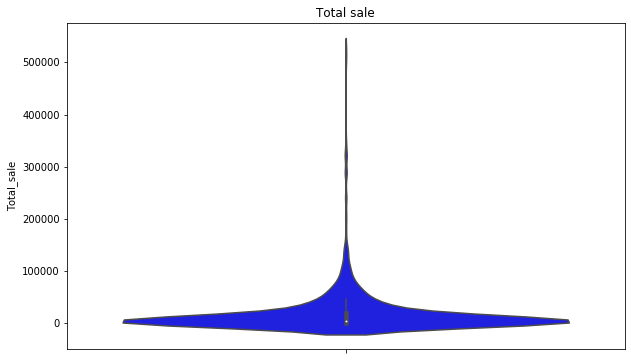

In [7]:
plt.figure(figsize=(10,6))
plt.title("Total sale")
sns.axes_style("dark")
sns.violinplot(y=df_ap["Total_sale"],color = 'blue')
plt.show()

In [41]:
#df_ai = pd.concat([df_ai,pd.get_dummies(df_ai['payment_type'], prefix='customer_profile')],axis=1)
df_ap = pd.concat([df_ap,pd.get_dummies(df_ap['category_id'],prefix='category_')],axis=1)
df_ap = pd.concat([df_ap,pd.get_dummies(df_ap['With_inapp_ornot'],prefix='App_')],axis=1)

In [42]:
df_ap 

,app_name,category_id,With_inapp_ornot,parent_app_id,Active_sales_day,download_volume,consumer_volume,Total_downloads,inapp_download,app_download,...,Total_sale,inapp_sale,app_sale,category__Entertainment,category__Games,category__Photos & Videos,category__Social Networking,category__Utilities,App__With Inapp,App__Without Inapp
384,aright Davy,Games,With Inapp,62bbc9735ee184a4,110,38853,13817,38853,38853,0,...,525102.47,525102.47,0.0,0,1,0,0,0,1,0
519,unwritten hungry,Games,With Inapp,8590a25d4e5c249c,110,64492,14889,64492,53780,10712,...,505560.20,505560.20,0.0,0,1,0,0,0,1,0
669,ceases half;,Games,With Inapp,a97a0c4386d37a1f,110,36122,13585,36122,36122,0,...,345035.78,345035.78,0.0,0,1,0,0,0,1,0
372,AS-IS vagueness,Games,With Inapp,606831f2120952a9,110,21094,11203,21094,21094,0,...,322966.06,322966.06,0.0,0,1,0,0,0,1,0
450,'vomited men,Games,With Inapp,74093d44c41ee885,110,17889,10424,17889,17889,0,...,322577.11,322577.11,0.0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,Chili psalmody,Entertainment,Without Inapp,1f6c4142d53f86d8,110,4205,3531,4205,0,4205,...,0.00,0.00,0.0,1,0,0,0,0,0,1
310,half-attained (DUODECIMO),Entertainment,Without Inapp,5059f004a5f90cec,110,4193,3529,4193,0,4193,...,0.00,0.00,0.0,1,0,0,0,0,0,1
108,sill fish;,Games,Without Inapp,1e3ac2b3b7716d41,110,4100,3456,4100,0,4100,...,0.00,0.00,0.0,0,1,0,0,0,0,1
316,alter wrought,Photos & Videos,Without Inapp,516eafe9a9fc183f,110,4121,3522,4121,0,4121,...,0.00,0.00,0.0,0,0,1,0,0,0,1


In [10]:
df_ap.columns

Index(['app_name', 'category_id', 'With_inapp_ornot', 'parent_app_id',
       'Active_sales_day', 'download_volume', 'consumer_volume',
       'Total_downloads', 'inapp_download', 'app_download', 'June_download',
       'July_download', 'August_download', 'September_download', 'Total_sale',
       'inapp_sale', 'app_sale', 'category__Entertainment', 'category__Games',
       'category__Photos & Videos', 'category__Social Networking',
       'category__Utilities', 'App__With Inapp', 'App__Without Inapp'],
      dtype='object')

In [43]:
features = ['app_name', 'category_id', 'With_inapp_ornot', 'parent_app_id',
       'Active_sales_day', 'download_volume', 'consumer_volume',
       'Total_downloads', 'inapp_download', 'app_download', 'June_download',
       'July_download', 'August_download', 'September_download', 'Total_sale',
       'inapp_sale', 'app_sale', 'category__Entertainment', 'category__Games',
       'category__Photos & Videos', 'category__Social Networking',
       'category__Utilities', 'App__With Inapp', 'App__Without Inapp']
feature_to_keep = ['Active_sales_day', 'consumer_volume',
       'Total_downloads', 'inapp_download', 'app_download', 'June_download',
       'July_download', 'August_download', 'September_download', 'Total_sale',
       'inapp_sale', 'app_sale', 'category__Entertainment', 'category__Games',
       'category__Photos & Videos', 'category__Social Networking',
       'category__Utilities', 'App__With Inapp', 'App__Without Inapp']

In [44]:
X = df_ap[feature_to_keep]


In [29]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()


In [30]:
std_X = ss.fit_transform(X)


#### Lets use Elbow method to see how many clusters we need to segments apps.

In [31]:
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kM = KMeans(n_clusters=k).fit(X) 
    kM.fit(X)     
      
    distortions.append(sum(np.min(cdist(X, kM.cluster_centers_,  
                      'euclidean'),axis=1)) / X.shape[0]) 
    inertias.append(kM.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(X, kM.cluster_centers_, 
                 'euclidean'),axis=1)) / X.shape[0] 
    mapping2[k] = kM.inertia_
    

1 : 32904.326547091114
2 : 26094.776039976317
3 : 15155.323956877235
4 : 11513.774777559267
5 : 10438.192391571058
6 : 8462.122863770675
7 : 8082.682923107054
8 : 6835.359408321904
9 : 6240.516549110649


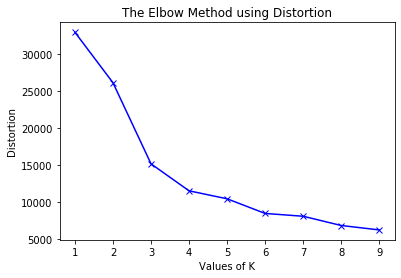

In [32]:
for key,val in mapping1.items(): 
    print(str(key)+' : '+str(val)) 
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 


1 : 3852315607375.463
2 : 1508848784148.0415
3 : 634444434180.6935
4 : 404183676246.8815
5 : 232821460027.21234
6 : 150499992650.3288
7 : 112257598148.12997
8 : 84037917109.19562
9 : 65818715119.11582


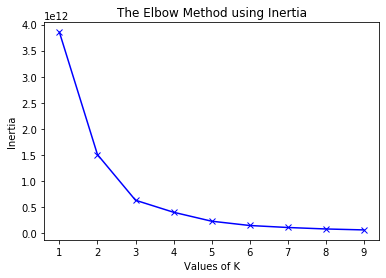

In [33]:
for key,val in mapping2.items(): 
    print(str(key)+' : '+str(val)) 
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show() 


#### Lets see how many clusters we need if we use standardized data

In [34]:
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,20) 
  
for k in K: 
    #Building and fitting the model 
    kM = KMeans(n_clusters=k).fit(std_X) 
    kM.fit(std_X)     
      
    distortions.append(sum(np.min(cdist(std_X, kM.cluster_centers_,  
                      'euclidean'),axis=1)) / std_X.shape[0]) 
    inertias.append(kM.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(std_X, kM.cluster_centers_, 
                 'euclidean'),axis=1)) / std_X.shape[0] 
    mapping2[k] = kM.inertia
    _ 

1 : 3.7017245602291657
2 : 3.427363983841054
3 : 3.02723286558954
4 : 2.8399535191716883
5 : 2.5940356025875775
6 : 2.4768296665205507
7 : 2.343532859660834
8 : 2.1872403321277365
9 : 2.0720259916680877
10 : 1.8442429423277085
11 : 1.7208540736521445
12 : 1.6149821629086418
13 : 1.5944762024817458
14 : 1.5832791976664218
15 : 1.4069093576941436
16 : 1.2662475623391334
17 : 1.1538968829451997
18 : 1.0638441777629324
19 : 1.0225186512468927


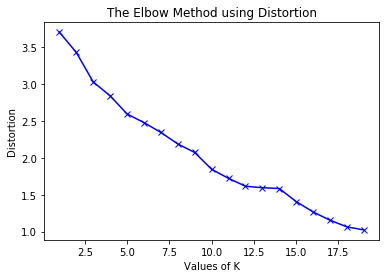

In [35]:
for key,val in mapping1.items(): 
    print(str(key)+' : '+str(val)) 
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 


1 : 18999.999999999996
2 : 14304.313698400034
3 : 11487.627512262156
4 : 9756.364273798205
5 : 8508.481859230262
6 : 7699.725292398426
7 : 7410.424836635571
8 : 6562.3186633446685
9 : 6002.141550043256
10 : 5567.249179701457
11 : 4760.439684488049
12 : 4386.453499510123
13 : 3882.2866652410016
14 : 3521.914971591561
15 : 3102.6004615387887
16 : 2783.1806807141975
17 : 2527.561278847311
18 : 2344.2599114304357
19 : 2211.7322351662356


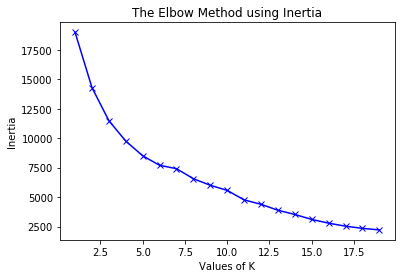

In [36]:

for key,val in mapping2.items(): 
    print(str(key)+' : '+str(val)) 
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show() 


#### For application dimension, it seems like using the unstandardized data set may be a better choice. Also lets try out 3,4,5 for our k numbers 

In [37]:
km3 = KMeans(n_clusters=3)
clusters = km3.fit_predict(X.iloc[:,0:])
X["label"] = clusters


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [38]:
X


,Active_sales_day,consumer_volume,Total_downloads,inapp_download,app_download,June_download,July_download,August_download,September_download,Total_sale,inapp_sale,app_sale,category__Entertainment,category__Games,category__Photos & Videos,category__Social Networking,category__Utilities,App__With Inapp,App__Without Inapp,label
384,110,13817,38853,38853,0,10671,10893,9943,7346,525102.47,525102.47,0.0,0,1,0,0,0,1,0,1
519,110,14889,64492,53780,10712,14862,16944,18270,14416,505560.20,505560.20,0.0,0,1,0,0,0,1,0,1
669,110,13585,36122,36122,0,9848,10334,9048,6892,345035.78,345035.78,0.0,0,1,0,0,0,1,0,1
372,110,11203,21094,21094,0,5612,5998,5372,4112,322966.06,322966.06,0.0,0,1,0,0,0,1,0,1
450,110,10424,17889,17889,0,4999,5062,4517,3311,322577.11,322577.11,0.0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,110,3531,4205,0,4205,1131,1185,1087,802,0.00,0.00,0.0,1,0,0,0,0,0,1,0
310,110,3529,4193,0,4193,1066,1183,1088,856,0.00,0.00,0.0,1,0,0,0,0,0,1,0
108,110,3456,4100,0,4100,1101,1110,1062,827,0.00,0.00,0.0,0,1,0,0,0,0,1,0
316,110,3522,4121,0,4121,1109,1140,1107,765,0.00,0.00,0.0,0,0,1,0,0,0,1,0


In [39]:
X['label'].value_counts()

0    850
2    137
1     13
Name: label, dtype: int64

In [42]:
##Fitting kmeans to the dataset with k=3
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#Visualizing the clusters for k=3


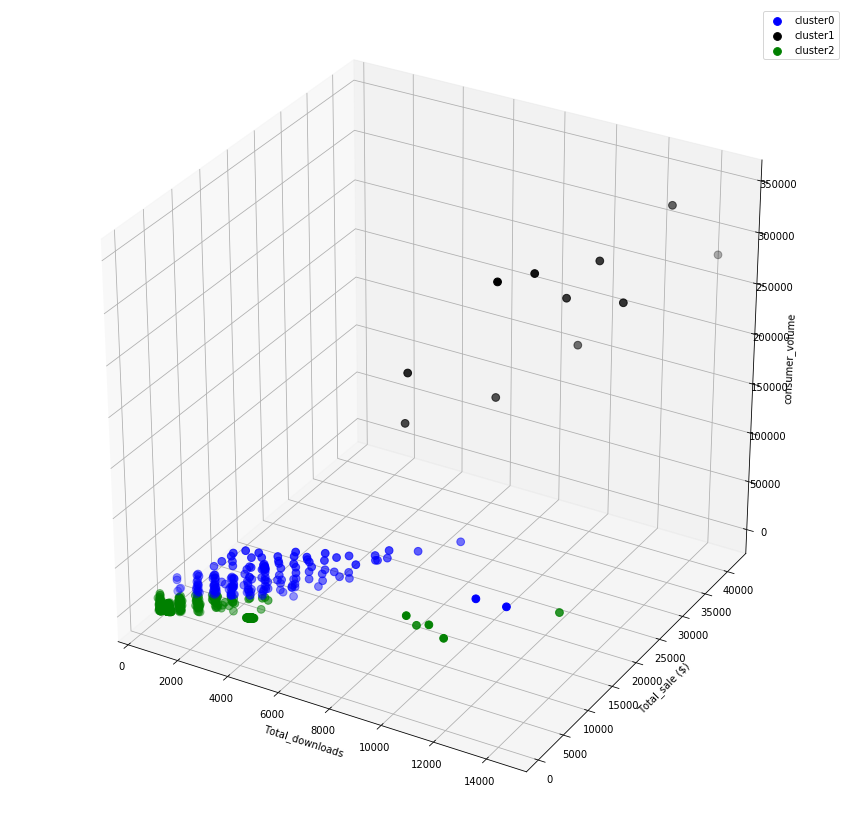

In [134]:
#visualize them 
%matplotlib inline
fig5 = plt.figure(figsize=(15,15))
ax = fig5.add_subplot(111, projection = '3d')
label0 = ax.scatter(X['consumer_volume'][X["label"] == 0],X['Total_downloads'][X["label"] == 0],X['Total_sale'][X["label"] == 0], c='blue', s=60)
label1 = ax.scatter(X['consumer_volume'][X["label"] == 1],X['Total_downloads'][X["label"] == 1],X['Total_sale'][X["label"] == 1], c='black', s=60)
label2 = ax.scatter(X['consumer_volume'][X["label"] == 2],X['Total_downloads'][X["label"] == 2],X['Total_sale'][X["label"] == 2], c='green', s=60)
ax.legend((label0,label1,label2),('cluster0','cluster1','cluster2'))
ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([10, 10, 10, 10]))


#ax.view_init(30, 185)
plt.xlabel("Total_downloads")
plt.ylabel("Total_sale ($)")
ax.set_zlabel('consumer_volume')
plt.show()

In [49]:
#Then 4 clusters
km4 = KMeans(n_clusters=4)
clusters = km4.fit_predict(X.iloc[:,0:])
X["label"] = clusters


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [50]:
X['label'].value_counts()


0    777
3    174
2     38
1     11
Name: label, dtype: int64

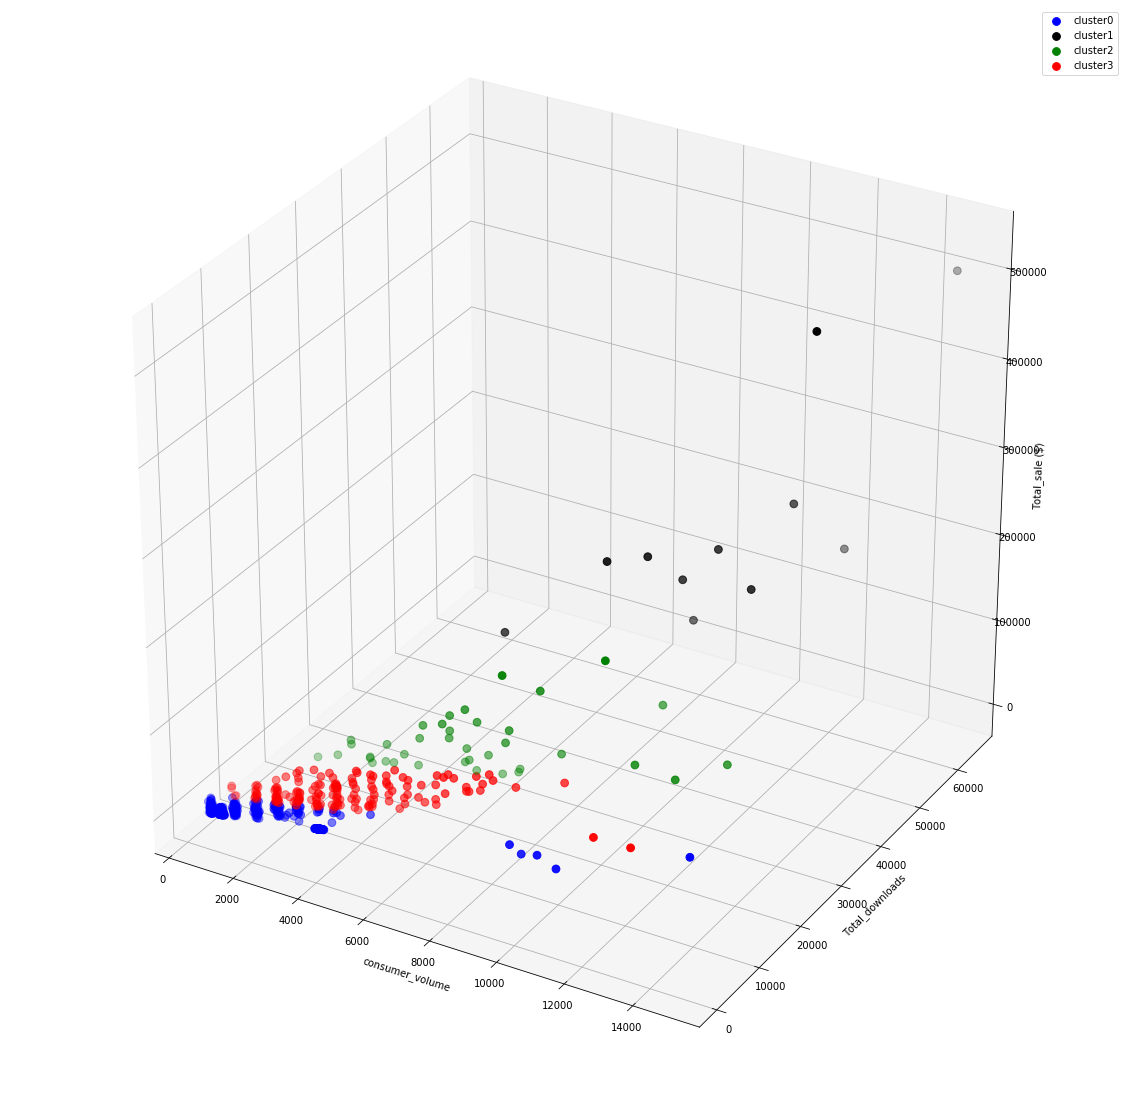

In [51]:
#visualize them 
%matplotlib inline
fig6 = plt.figure(figsize=(20,20))
ax = fig6.add_subplot(111, projection = '3d')
label0 = ax.scatter(X['consumer_volume'][X["label"] == 0],X['Total_downloads'][X["label"] == 0],X['Total_sale'][X["label"] == 0], c='blue', s=60)
label1 = ax.scatter(X['consumer_volume'][X["label"] == 1],X['Total_downloads'][X["label"] == 1],X['Total_sale'][X["label"] == 1], c='black', s=60)
label2 = ax.scatter(X['consumer_volume'][X["label"] == 2],X['Total_downloads'][X["label"] == 2],X['Total_sale'][X["label"] == 2], c='green', s=60)
label3 = ax.scatter(X['consumer_volume'][X["label"] == 3],X['Total_downloads'][X["label"] == 3],X['Total_sale'][X["label"] == 3], c='red', s=60)
ax.legend((label0,label1,label2,label3),('cluster0','cluster1','cluster2','cluster3'))
ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([10, 10, 10, 10]))

#ax.view_init(30, 185)
plt.xlabel("consumer_volume")
plt.ylabel("Total_downloads")
ax.set_zlabel('Total_sale ($)')
plt.show()




In [55]:
#Lets take a look at what each segment looks like.Firstly,lets take a look at the consumer_volume metrics
X.groupby('label')['consumer_volume'].describe()


,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0,777.0,1935.489060,1356.193743,604.0,930.0,1039.0,3494.00,12901.0
1,11.0,12396.909091,1977.398769,8167.0,11525.5,12479.0,13701.00,14889.0
2,38.0,7255.236842,2317.854663,3533.0,5492.5,7150.0,8249.50,13390.0
3,174.0,4032.954023,1760.713064,1247.0,2881.0,3865.5,4892.75,11715.0


In [56]:
#Lets take a look at what each segment looks like.Firstly,lets take a look at the Total_downloads metrics
X.groupby('label')['Total_downloads'].describe()


,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0,777.0,2206.117117,1669.401881,634.0,961.0,1088.0,4123.00,17970.0
1,11.0,30533.454545,14289.954166,12134.0,22605.0,26378.0,37487.50,64492.0
2,38.0,10906.184211,4531.841442,4296.0,7462.5,10608.0,12494.25,23510.0
3,174.0,5215.373563,2718.418389,1343.0,3442.0,4843.5,6364.50,16323.0


In [57]:
#Lets take a look at what each segment looks like.Firstly,lets take a look at the Total Sales metrics
X.groupby('label')['Total_sale'].describe()


,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0,777.0,4611.248211,5725.260001,0.00,0.000,2711.93,7101.8700,23580.70
1,11.0,335145.854545,94994.172038,238035.45,286664.570,318815.69,334000.9200,525102.47
2,38.0,112529.370263,31698.665611,78370.86,88745.445,105900.20,129487.2875,210576.84
3,174.0,43077.612471,14645.773522,23838.28,30921.895,39145.36,53280.5050,77072.87


In [59]:
X.groupby('label')['inapp_sale'].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0,777.0,3291.067027,6038.649092,0.00,0.000,0.00,3528.6600,23580.70
1,11.0,335145.854545,94994.172038,238035.45,286664.570,318815.69,334000.9200,525102.47
2,38.0,112529.370263,31698.665611,78370.86,88745.445,105900.20,129487.2875,210576.84
3,174.0,43077.612471,14645.773522,23838.28,30921.895,39145.36,53280.5050,77072.87


In [114]:
#Then 5 clusters
km5 = KMeans(n_clusters=5)
clusters = km5.fit_predict(X)
X["label"] = clusters


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [115]:
X['label'].value_counts()


2    759
0    179
3     49
1     11
4      2
Name: label, dtype: int64

In [105]:
#Lets take a look at what each segment looks like.Firstly,lets take a look at the consumer_volume metrics
X.groupby('label')['consumer_volume'].describe()


,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0,759.0,1915.935441,1360.105425,604.0,928.5,1012.0,3494.0,12901.0
1,11.0,11466.272727,2095.452366,8103.0,10395.0,11848.0,13018.5,14485.0
2,49.0,6879.469388,2111.251259,3533.0,5269.0,6776.0,7691.0,13390.0
3,179.0,3751.675978,1658.366811,1247.0,2468.0,3482.0,4439.0,11715.0
4,2.0,14353.000000,758.018469,13817.0,14085.0,14353.0,14621.0,14889.0


In [106]:
#Lets take a look at what each segment looks like.Firstly,lets take a look at the Total_downloads metrics
X.groupby('label')['Total_downloads'].describe()


,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0,759.0,2180.172596,1671.031421,634.0,960.00,1048.0,4124.00,17970.0
1,11.0,23859.909091,9126.222192,11920.0,17952.50,24116.0,26854.50,41204.0
2,49.0,10151.571429,4099.187750,4296.0,7043.00,9916.0,11913.00,23510.0
3,179.0,4770.664804,2501.994660,1343.0,2861.50,4267.0,5698.00,16323.0
4,2.0,51672.500000,18129.510763,38853.0,45262.75,51672.5,58082.25,64492.0


In [107]:
#Lets take a look at what each segment looks like.Firstly,lets take a look at the Total Sales metrics
X.groupby('label')['Total_sale'].describe()


,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0,759.0,4188.127642,5080.248724,0.00,0.0000,2069.600,6713.8950,20873.91
1,11.0,278320.942727,49748.948044,195011.80,240749.5550,289883.710,320696.4000,345035.78
2,49.0,98299.615306,25604.938385,69024.96,77072.8700,90204.910,110038.0300,172915.35
3,179.0,38846.378939,12983.772256,21297.20,28476.5350,35916.740,49242.6850,67792.38
4,2.0,515331.335000,13818.471637,505560.20,510445.7675,515331.335,520216.9025,525102.47


#### Also lets try out gaussian mix model as well. Gaussian Mixture Models (GMMs) assume that there are a certain number of Gaussian distributions, and each of these distributions represent a cluster. Hence, a Gaussian Mixture Model tends to group the data points belonging to a single distribution together.

In [13]:
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA


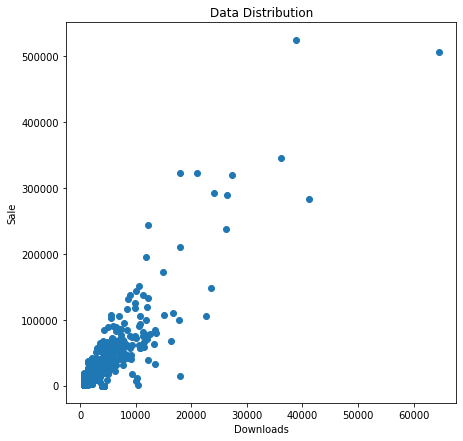

In [14]:
plt.figure(figsize=(7,7))
plt.scatter(X['Total_downloads'], X['Total_sale'])
plt.xlabel('Downloads')
plt.ylabel('Sale')
plt.title('Data Distribution')
plt.show()


#### To compared GMM to kmeans directly, we reintroduce the kmeans method here

In [19]:
km4 = KMeans(n_clusters=4)
clusters = km4.fit_predict(X.iloc[:,0:])
X["label"] = clusters


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


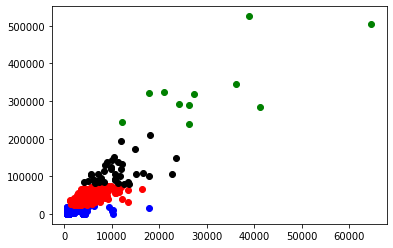

In [24]:
color=['blue','green','red', 'black']
for k in range(0,4):
    data = X[X["label"]==k]
    plt.scatter(data["Total_downloads"],data["Total_sale"],c=color[k])
plt.show()


###### Let’s now build a Gaussian Mixture Model on the same data and see if we can improve on k-means:



In [45]:
# training gaussian mixture model 
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4)
clusters = gmm.fit_predict(X)
X["label"] = clusters


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


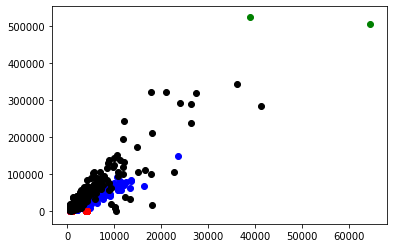

In [46]:
color=['blue','green','red', 'black']
for k in range(0,4):
    data = X[X["label"]==k]
    plt.scatter(data["Total_downloads"],data["Total_sale"],c=color[k])
plt.show()


In [47]:
X['label'].value_counts()

2    535
0    274
3    189
1      2
Name: label, dtype: int64

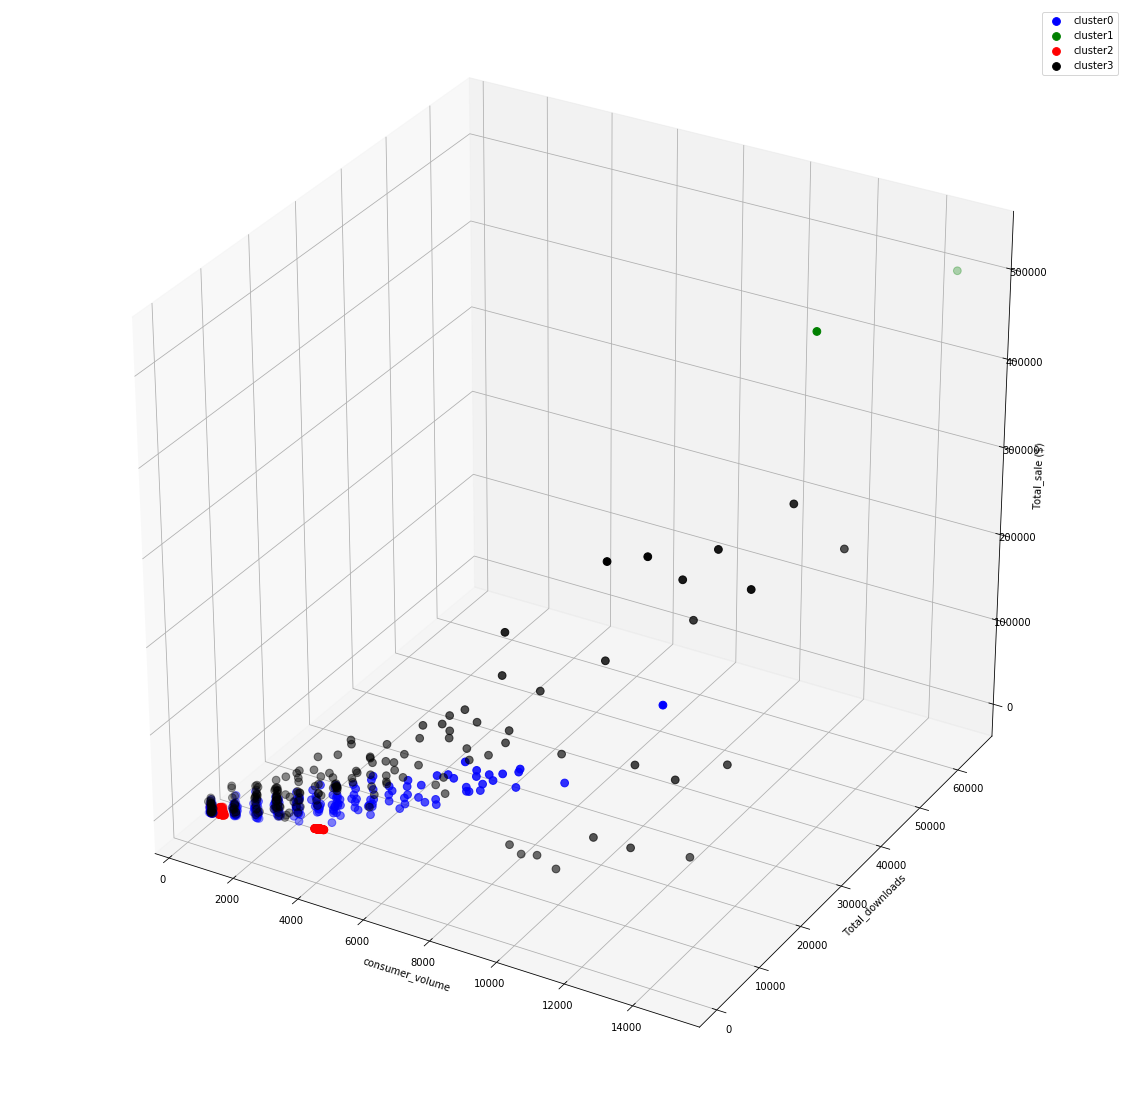

In [48]:
#visualize the result in 3D
%matplotlib inline
fig6 = plt.figure(figsize=(20,20))
ax = fig6.add_subplot(111, projection = '3d')
label0 = ax.scatter(X['consumer_volume'][X["label"] == 0],X['Total_downloads'][X["label"] == 0],X['Total_sale'][X["label"] == 0], c='blue', s=60)
label1 = ax.scatter(X['consumer_volume'][X["label"] == 1],X['Total_downloads'][X["label"] == 1],X['Total_sale'][X["label"] == 1], c='green', s=60)
label2 = ax.scatter(X['consumer_volume'][X["label"] == 2],X['Total_downloads'][X["label"] == 2],X['Total_sale'][X["label"] == 2], c='red', s=60)
label3 = ax.scatter(X['consumer_volume'][X["label"] == 3],X['Total_downloads'][X["label"] == 3],X['Total_sale'][X["label"] == 3], c='black', s=60)
ax.legend((label0,label1,label2,label3),('cluster0','cluster1','cluster2','cluster3'))
ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([10, 10, 10, 10]))

#ax.view_init(30, 185)
plt.xlabel("consumer_volume")
plt.ylabel("Total_downloads")
ax.set_zlabel('Total_sale ($)')
plt.show()

